In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualizations to display in the notebook
%matplotlib inline

# Load the dataset
df = pd.read_csv('../data/salary.csv')

# Basic inspection
print(f"Dataset shape: {df.shape}")
df.head()


Dataset shape: (375, 2)


,id,Salary
0,0,90000.0
1,1,65000.0
2,2,150000.0
3,3,60000.0
4,4,200000.0


In [2]:
# Data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      375 non-null    int64  
 1   Salary  373 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 6.0 KB


In [3]:
# Summary statistics
df.describe()

,id,Salary
count,375.000000,373.000000
mean,187.000000,100577.345845
std,108.397417,48240.013482
min,0.000000,350.000000
25%,93.500000,55000.000000
50%,187.000000,95000.000000
75%,280.500000,140000.000000
max,374.000000,250000.000000


In [4]:
df2 = pd.read_csv('../data/people.csv')
print(f"Dataset shape: {df2.shape}")
df2.head()

Dataset shape: (375, 6)


,id,Age,Gender,Education Level,Job Title,Years of Experience
0,0,32.0,Male,Bachelor's,Software Engineer,5.0
1,1,28.0,Female,Master's,Data Analyst,3.0
2,2,45.0,Male,PhD,Senior Manager,15.0
3,3,36.0,Female,Bachelor's,Sales Associate,7.0
4,4,52.0,Male,Master's,Director,20.0


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   375 non-null    int64  
 1   Age                  370 non-null    float64
 2   Gender               370 non-null    object 
 3   Education Level      370 non-null    object 
 4   Job Title            370 non-null    object 
 5   Years of Experience  373 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 17.7+ KB


In [6]:
df3 = pd.read_csv('../data/descriptions.csv')
print(f"Dataset shape: {df3.shape}")
df3.head()

Dataset shape: (375, 2)


,id,Description
0,0,I am a 32-year-old male working as a Software ...
1,1,I am a 28-year-old data analyst with a Master'...
2,2,I am a 45-year-old Senior Manager with a PhD a...
3,3,I am a 36-year-old female Sales Associate with...
4,4,I am a 52-year-old male with over two decades ...


Let's explore the target variable 'Salary'

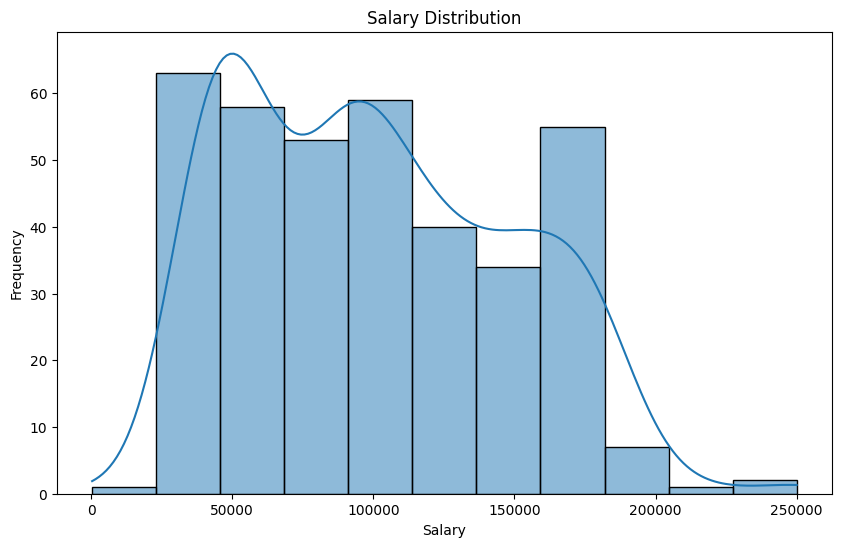

In [7]:
# Distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(df['Salary'], kde=True)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

In [8]:
# Check for skewness
print(f"Skewness: {df['Salary'].skew()}")

Skewness: 0.400578053273342


The distribution is slightly right-skewed. Most salary values are clustered towards the lower end. It's not skewed enough to necessarily require transformation.


Explore relationships between features and target

In [10]:
# Merge the dataframes
train_data = df.merge(df2, on='id', how='left')

In [11]:
train_data.head()

,id,Salary,Age,Gender,Education Level,Job Title,Years of Experience
0,0,90000.0,32.0,Male,Bachelor's,Software Engineer,5.0
1,1,65000.0,28.0,Female,Master's,Data Analyst,3.0
2,2,150000.0,45.0,Male,PhD,Senior Manager,15.0
3,3,60000.0,36.0,Female,Bachelor's,Sales Associate,7.0
4,4,200000.0,52.0,Male,Master's,Director,20.0


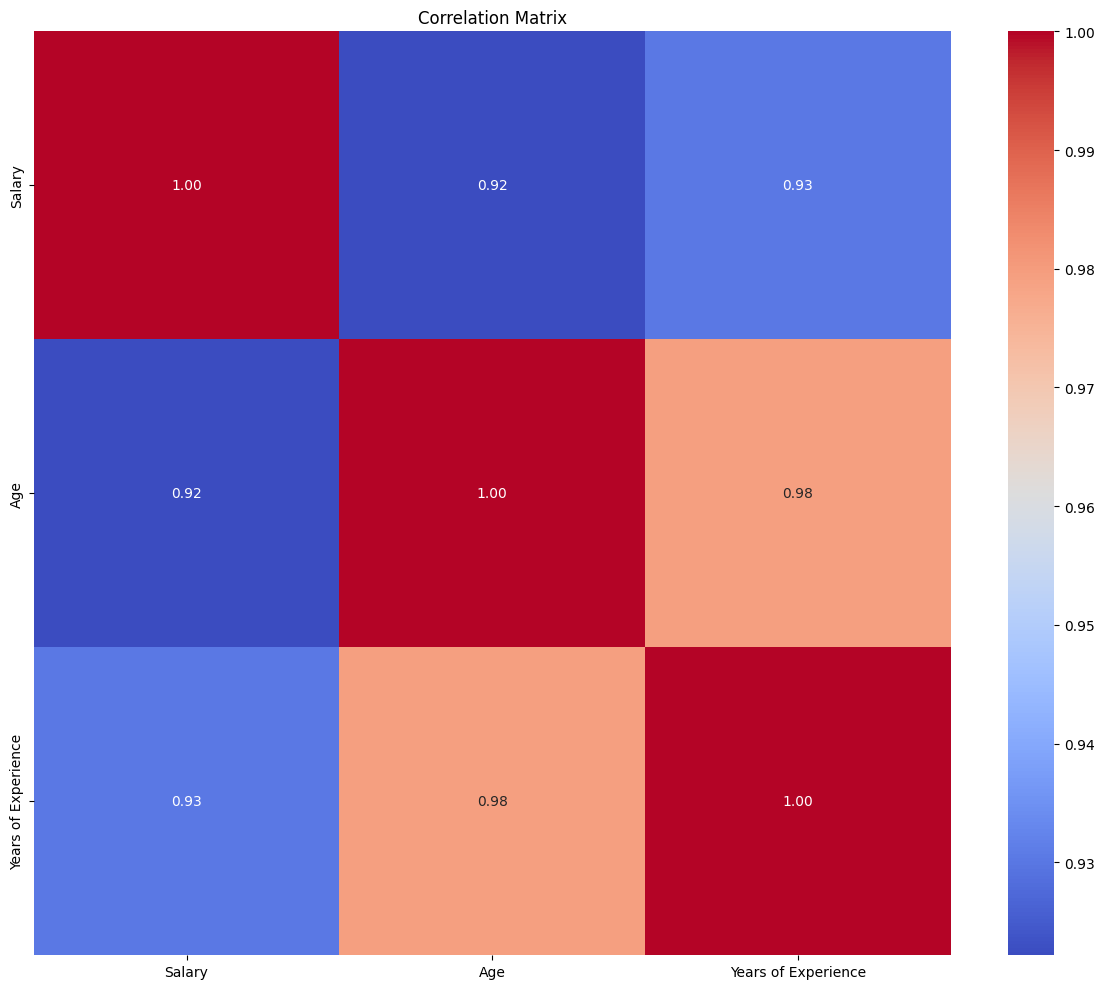

In [13]:
numeric_cols = train_data.select_dtypes(include=['int64', 'float64']).columns
# Exclude 'id' from correlation
numeric_cols = numeric_cols[numeric_cols != 'id']
# Calculate correlation matrix
correlation = train_data[numeric_cols].corr()

# Heatmap of correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


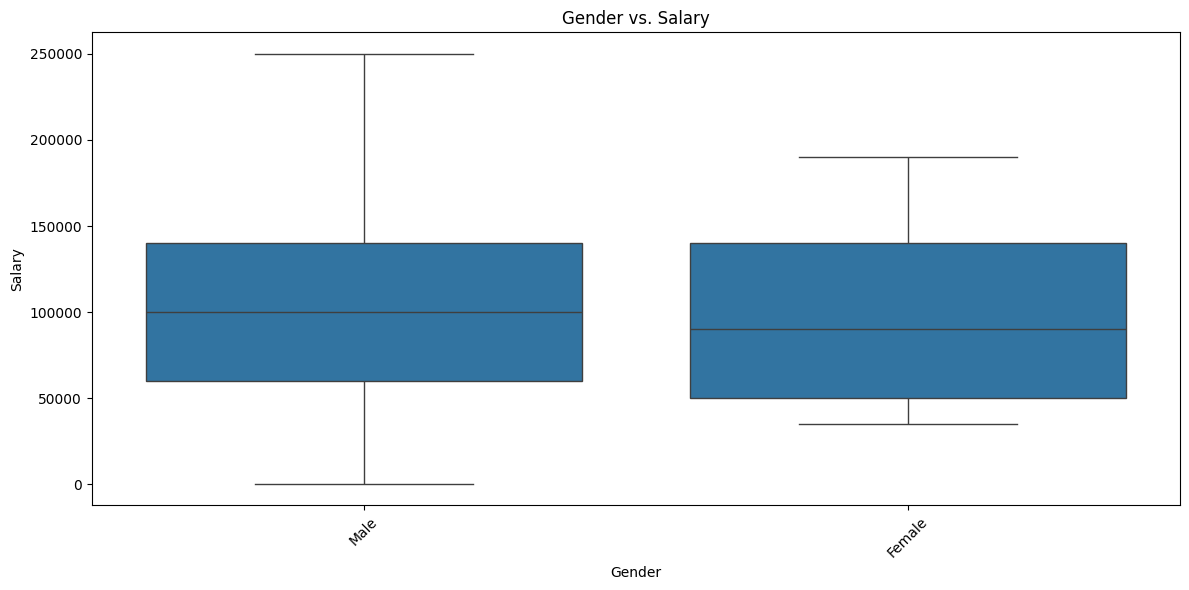

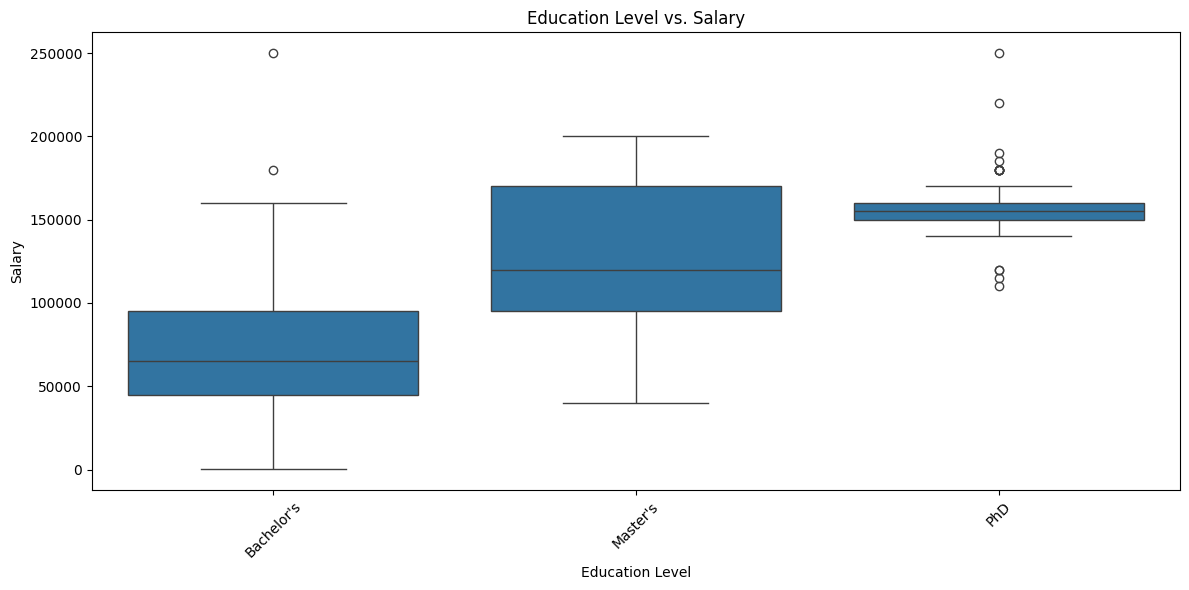

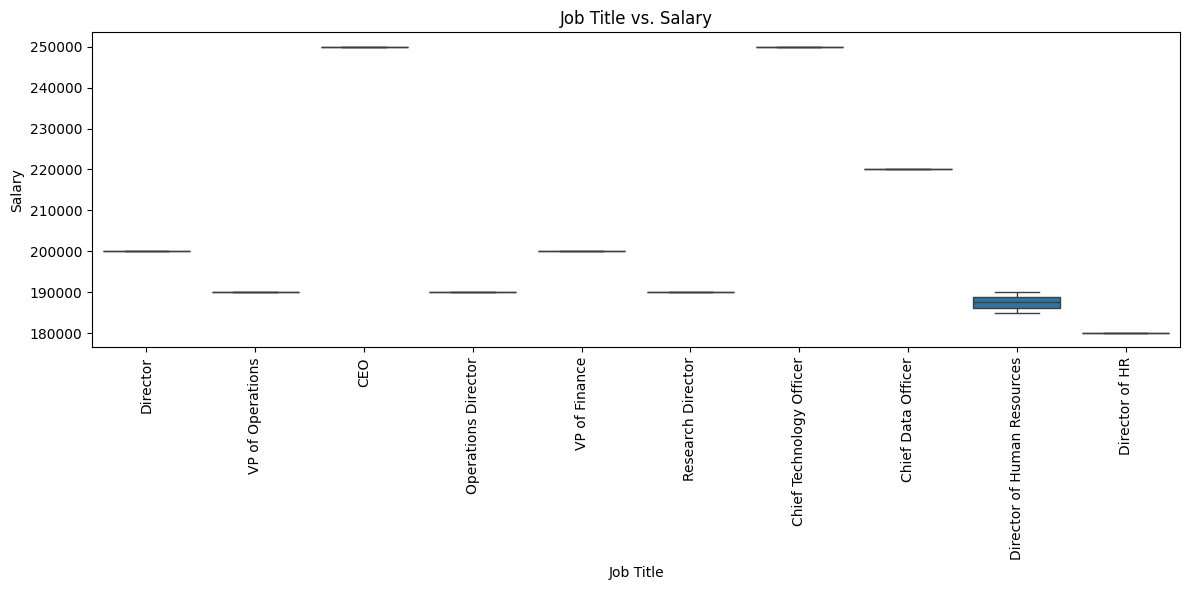

In [ ]:
# Categorical variables analysis
categorical_cols = train_data.select_dtypes(include=['object']).columns

# Create visualizations for categorical variables
for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    if train_data[col].nunique() < 10:
        # For columns with few unique values
        sns.boxplot(x=col, y='Salary', data=train_data)
        plt.xticks(rotation=45)
    else:
        # For columns with many unique values
        # Group and show top 10 categories by average salary
        top_categories = train_data.groupby(col)['Salary'].mean().sort_values(ascending=False).head(10).index
        sns.boxplot(x=col, y='Salary', data=train_data[train_data[col].isin(top_categories)])
        plt.xticks(rotation=90)
    
    plt.title(f'{col} vs. Salary')
    plt.tight_layout()
    plt.show()

# Look at text features - if job descriptions are available
if 'job_description' in train_data.columns:
    # Sample first 5 job descriptions to understand the data
    print("Sample job descriptions:")
    for i, desc in enumerate(train_data['job_description'].head(5)):
        print(f"\nDescription {i+1}:\n{desc[:300]}...")